In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku 
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [2]:
data = open('/kaggle/input/sonnets/sonnets.txt').read()
data[:500]

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makes"

In [3]:
wordcloud = WordCloud(max_font_size=50, max_words=100,
                   background_color="white").generate(data)

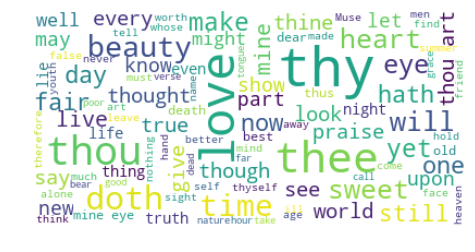

In [4]:
plt.rcParams['savefig.dpi'] = 300
plt.figure(figsize = (8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("poemcloud.png")
plt.show()

In [5]:
corpus = data.lower().split("\n")
corpus[:5]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,']

In [6]:
length = []
for line in corpus:
    length.append(len(line))
pd.Series(length).describe()

count    2158.000000
mean       42.363299
std         4.495667
min         0.000000
25%        40.000000
50%        42.000000
75%        45.000000
max        60.000000
dtype: float64

In [7]:
corpus_new = []
for i in corpus:
    if len(i) == 0:
        continue
    else:
        corpus_new.append(i)

In [8]:
length_new = []
for line in corpus_new:
    length_new.append(len(line))
pd.Series(length_new).describe()

count    2156.000000
mean       42.402597
std         4.308441
min         6.000000
25%        40.000000
50%        42.000000
75%        45.000000
max        60.000000
dtype: float64

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)

print(total_words)

3210


In [10]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [11]:
model = Sequential()
model.add(Embedding(total_words+1, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 3210)              324210    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              10310521  
Total params: 11,417,431
Trainable params: 11,417,431
Non-trainable params: 0
____________________________________________

In [12]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Train on 15462 samples
Epoch 1/150
15462/15462 [==============================] - 18s 1ms/sample - loss: 6.8891 - accuracy: 0.0197
Epoch 2/150
15462/15462 [==============================] - 8s 523us/sample - loss: 6.5057 - accuracy: 0.0230
Epoch 3/150
15462/15462 [==============================] - 8s 502us/sample - loss: 6.3997 - accuracy: 0.0240
Epoch 4/150
15462/15462 [==============================] - 8s 511us/sample - loss: 6.2714 - accuracy: 0.0319
Epoch 5/150
15462/15462 [==============================] - 8s 512us/sample - loss: 6.1594 - accuracy: 0.0392
Epoch 6/150
15462/15462 [==============================] - 8s 491us/sample - loss: 6.0689 - accuracy: 0.0389
Epoch 7/150
15462/15462 [==============================] - 8s 504us/sample - loss: 5.9666 - accuracy: 0.0437
Epoch 8/150
15462/15462 [==============================] - 8s 505us/sample - loss: 5.8633 - accuracy: 0.0487
Epoch 9/150
15462/15462 [==============================] - 8s 501us/sample - loss: 5.7585 - accuracy: 0.05

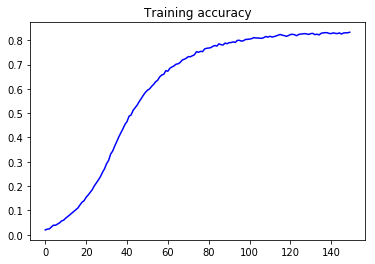

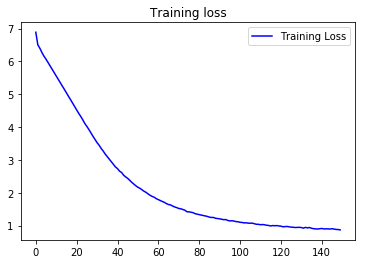

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [14]:
seed_text = "I love you, but"
next_words = 300
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I love you, but be strongly in my nature decay ' prove none ' night near lie none prove be ill might write me lies you releasing prove thee old true ' prove thee best remain remain hence face new ' prove be dwell in true might see you now remains none know so shame best brought of kings hate of go old moan to one dwell in ill doth give ill pride state in thee now behold be hence ' old end express'd clear part ' prove be ride brought of loss new than back doth room hate lies releasing thee more lies hence part doth thought doth stand shall write all thee me it doth so friend doth stay thee shall prove make 'will ' set new light quite express'd quite asleep esteem'd strong place me by seeming none hate lived was show thee the better part of me green me old wrong prove ill skill old day name ill skill of something fair of one ' must me one due of die me 'will ' prove his woe ' might grow quite treason esteem'd quite turns now fortify should bear their antique gain ' prove ill more ' quite